In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [3]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [7]:
#使用尺度更小的网络
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [5]:
#老模型训练
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 7s 264us/step - loss: 0.4568 - acc: 0.8241 - val_loss: 0.3431 - val_acc: 0.8789
Epoch 2/20
25000/25000 [==============================] - 5s 215us/step - loss: 0.2694 - acc: 0.9065 - val_loss: 0.2902 - val_acc: 0.8878
Epoch 3/20
25000/25000 [==============================] - 5s 211us/step - loss: 0.2063 - acc: 0.9280 - val_loss: 0.2833 - val_acc: 0.8868
Epoch 4/20
25000/25000 [==============================] - 5s 209us/step - loss: 0.1712 - acc: 0.9407 - val_loss: 0.2888 - val_acc: 0.8856
Epoch 5/20
25000/25000 [==============================] - 5s 210us/step - loss: 0.1453 - acc: 0.9501 - val_loss: 0.3051 - val_acc: 0.8815
Epoch 6/20
25000/25000 [==============================] - 5s 209us/step - loss: 0.1270 - acc: 0.9562 - val_loss: 0.3356 - val_acc: 0.8748
Epoch 7/20
25000/25000 [==============================] - 5s 210us/step - 

In [8]:
#尺寸小一些的网络的训练
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 6s 226us/step - loss: 0.5232 - acc: 0.8066 - val_loss: 0.4189 - val_acc: 0.8670
Epoch 2/20
25000/25000 [==============================] - 5s 197us/step - loss: 0.3370 - acc: 0.8970 - val_loss: 0.3340 - val_acc: 0.8819
Epoch 3/20
25000/25000 [==============================] - 5s 197us/step - loss: 0.2583 - acc: 0.9165 - val_loss: 0.2935 - val_acc: 0.8893
Epoch 4/20
25000/25000 [==============================] - 5s 199us/step - loss: 0.2153 - acc: 0.9284 - val_loss: 0.2811 - val_acc: 0.8892
Epoch 5/20
25000/25000 [==============================] - 5s 198us/step - loss: 0.1867 - acc: 0.9379 - val_loss: 0.2872 - val_acc: 0.8841
Epoch 6/20
25000/25000 [==============================] - 5s 197us/step - loss: 0.1665 - acc: 0.9435 - val_loss: 0.2832 - val_acc: 0.8863
Epoch 7/20
25000/25000 [==============================] - 5s 201us/step - loss: 0.1506 - acc: 0.9501 - val_loss: 0.2901 - 

In [9]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

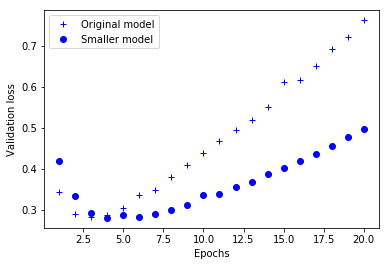

In [11]:
import matplotlib.pyplot as plt
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [12]:
#创建更大的模型
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [13]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 21s 849us/step - loss: 0.4644 - acc: 0.7938 - val_loss: 0.2875 - val_acc: 0.8872
Epoch 2/20
25000/25000 [==============================] - 21s 850us/step - loss: 0.2239 - acc: 0.9123 - val_loss: 0.3400 - val_acc: 0.8591
Epoch 3/20
25000/25000 [==============================] - 21s 825us/step - loss: 0.1351 - acc: 0.9489 - val_loss: 0.3449 - val_acc: 0.8737
Epoch 4/20
25000/25000 [==============================] - 21s 830us/step - loss: 0.0772 - acc: 0.9789 - val_loss: 0.3821 - val_acc: 0.8836
Epoch 5/20
25000/25000 [==============================] - 21s 823us/step - loss: 0.0519 - acc: 0.9882 - val_loss: 0.4914 - val_acc: 0.8834
Epoch 6/20
25000/25000 [==============================] - 20s 819us/step - loss: 0.0627 - acc: 0.9890 - val_loss: 0.4743 - val_acc: 0.8765
Epoch 7/20
25000/25000 [==============================] - 20s 816us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.

KeyboardInterrupt: 

In [14]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [16]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 6s 259us/step - loss: 0.5469 - acc: 0.7988 - val_loss: 0.4252 - val_acc: 0.8790
Epoch 2/20
25000/25000 [==============================] - 5s 215us/step - loss: 0.3443 - acc: 0.9008 - val_loss: 0.3554 - val_acc: 0.8826
Epoch 3/20
25000/25000 [==============================] - 5s 214us/step - loss: 0.2815 - acc: 0.9182 - val_loss: 0.3281 - val_acc: 0.8903
Epoch 4/20
25000/25000 [==============================] - 5s 212us/step - loss: 0.2551 - acc: 0.9265 - val_loss: 0.3295 - val_acc: 0.8883
Epoch 5/20
25000/25000 [==============================] - 6s 225us/step - loss: 0.2400 - acc: 0.9330 - val_loss: 0.3335 - val_acc: 0.8859
Epoch 6/20
25000/25000 [==============================] - 5s 213us/step - loss: 0.2288 - acc: 0.9375 - val_loss: 0.3395 - val_acc: 0.8842
Epoch 7/20
25000/25000 [==============================] - 5s 217us/step - loss: 0.2196 - acc: 0.9411 - val_loss: 0.3503 - 

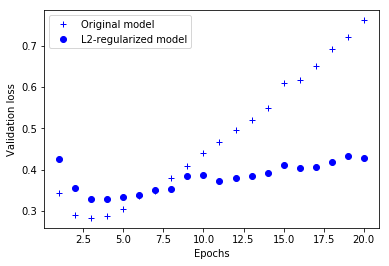

In [17]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [19]:
from keras import regularizers

regularizers.l1(0.001)

regularizers.l1_l2(l1=0.001, l2=0.001)

In [22]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
#加入Dropout层
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [23]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 7s 265us/step - loss: 0.6348 - acc: 0.6365 - val_loss: 0.5539 - val_acc: 0.8496
Epoch 2/20
25000/25000 [==============================] - 5s 216us/step - loss: 0.5058 - acc: 0.7777 - val_loss: 0.4101 - val_acc: 0.8755
Epoch 3/20
25000/25000 [==============================] - 5s 216us/step - loss: 0.4101 - acc: 0.8395 - val_loss: 0.3287 - val_acc: 0.8864
Epoch 4/20
25000/25000 [==============================] - 5s 215us/step - loss: 0.3476 - acc: 0.8793 - val_loss: 0.2938 - val_acc: 0.8882
Epoch 5/20
25000/25000 [==============================] - 5s 215us/step - loss: 0.2970 - acc: 0.9025 - val_loss: 0.2810 - val_acc: 0.8876
Epoch 6/20
25000/25000 [==============================] - 5s 213us/step - loss: 0.2651 - acc: 0.9153 - val_loss: 0.2822 - val_acc: 0.8867
Epoch 7/20
25000/25000 [==============================] - 5s 217us/step - loss: 0.2371 - acc: 0.9251 - val_loss: 0.2929 - 

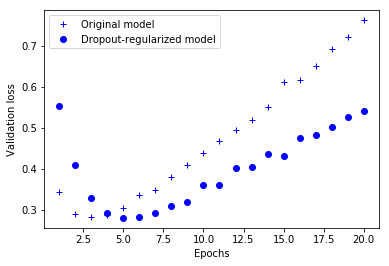

In [24]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()